In [ ]:
!pip install deepface

In [ ]:
from deepface import DeepFace
import cv2
from google.colab.patches import cv2_imshow

video = cv2.VideoCapture("/content/drive/MyDrive/Thumbnails/giveaway.MP4")

total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print(total_frames)
target_emotion = "happy"

happy_array = []
for i in range(0, total_frames, 60):
  video.set(cv2.CAP_PROP_POS_FRAMES, i)

  ret, frame = video.read()
  result = DeepFace.analyze(frame, actions = ['emotion'], enforce_detection=False)
  dom_emo = result["dominant_emotion"]
  print(dom_emo, result["emotion"][dom_emo])
  if result["emotion"][target_emotion] > 99:
    cv2_imshow(frame)
    happy_array.append(frame)

  if not ret:
    break

video.release()

In [ ]:
len(happy_array)

6

In [ ]:
happy_array[0].shape

(1080, 1920, 3)

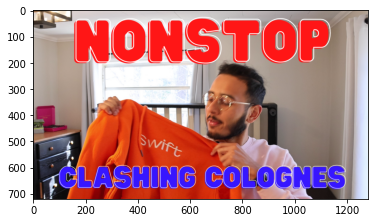

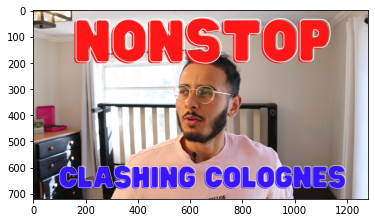

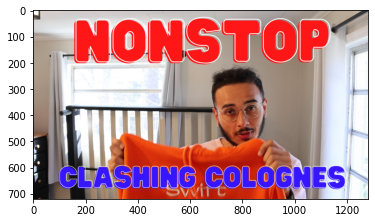

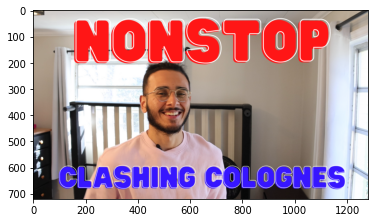

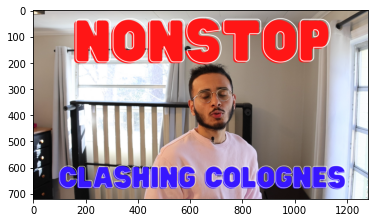

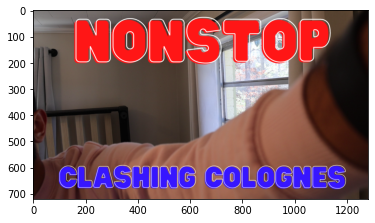

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt 

edited_imgs = []
for idx, img in enumerate(happy_array):
  resized_img = cv2.resize(img, None, fx=0.666667,fy=0.666667, interpolation=cv2.INTER_AREA)
  pil_img = Image.fromarray(resized_img[:,:,::-1])

  layover = Image.open("/content/drive/MyDrive/Thumbnails/cc_layover.png")
  position = (0,0)
  pil_img.paste(layover, position, layover)
  edited_imgs.append(pil_img)

  pil_img.save(f"/content/drive/MyDrive/Thumbnails/thumbnail-{idx}.jpg")
  plt.imshow(pil_img)
  plt.show()
  